# 4.1 Fashion MNIST 데이터셋 알아보기

In [1]:
%matplotlib inline
from torchvision import datasets, transforms, utils
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np

In [58]:
import torch

## [개념] Fashion MNIST 데이터셋

In [2]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [3]:
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

100%|█████████████████████████████████████████████████████████████████▊| 26345472/26421880 [01:14<00:00, 681243.28it/s]

Extracting ./.data/FashionMNIST\raw\train-images-idx3-ubyte.gz



0it [00:00, ?it/s]
 56%|████████████████████████████████████████▌                                | 16384/29515 [00:01<00:00, 49635.19it/s]
32768it [00:01, 32116.94it/s]                                                                                          

Extracting ./.data/FashionMNIST\raw\train-labels-idx1-ubyte.gz



0it [00:00, ?it/s]
 99%|██████████████████████████████████████████████████████████████████▎| 4374528/4422102 [00:06<00:00, 1099053.90it/s]

Extracting ./.data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz




0it [00:00, ?it/s]

  0%|                                                                                         | 0/5148 [00:00<?, ?it/s]

8192it [00:00, 12295.85it/s]                                                                                           

Extracting ./.data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [13]:
type(trainset)

torchvision.datasets.mnist.FashionMNIST

In [20]:
trainset.__class__.__base__.__base__

torch.utils.data.dataset.Dataset

In [17]:
trainset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [16]:
dir(trainset)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extract_gzip',
 'processed_folder',
 'raw_folder',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'urls']

In [4]:
batch_size = 16

train_loader = data.DataLoader(
    dataset     = trainset,
    batch_size  = batch_size
)
test_loader = data.DataLoader(
    dataset     = testset,
    batch_size  = batch_size
)

In [22]:
train_loader.__class__

torch.utils.data.dataloader.DataLoader

In [27]:
import collections.abc as abc
print(issubclass(type(train_loader), abc.Iterator))
print(issubclass(type(train_loader), abc.Generator))

False
False


In [5]:
dataiter       = iter(train_loader)
images, labels = next(dataiter)

In [28]:
import collections.abc as abc
print(issubclass(type(dataiter), abc.Iterator))
print(issubclass(type(dataiter), abc.Generator))

True
False


In [29]:
type(images)

torch.Tensor

In [31]:
images.ndimension()

4

In [43]:
images[0][0].numpy().shape

(28, 28)

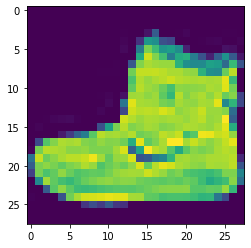

In [47]:
plt.imshow( images[0][0].numpy())

## 멀리서 살펴보기

누군가 "숲을 먼저 보고 나무를 보라"고 했습니다. 데이터셋을 먼저 전체적으로 살펴보며 어떤 느낌인지 알아보겠습니다.

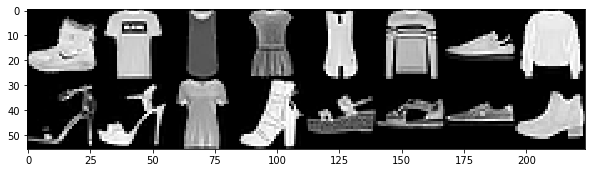

In [6]:
img   = utils.make_grid(images, padding=0)
npimg = img.numpy()
plt.figure(figsize=(10, 7))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()

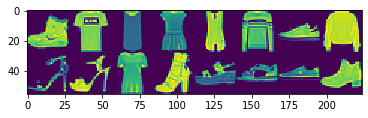

In [53]:
plt.imshow(npimg[0])

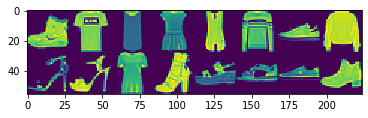

In [54]:
plt.imshow(npimg[1])

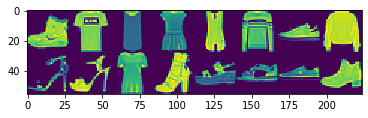

In [56]:
plt.imshow(npimg[2])

In [50]:
help(utils.make_grid)

Help on function make_grid in module torchvision.utils:

make_grid(tensor, nrow=8, padding=2, normalize=False, range=None, scale_each=False, pad_value=0)
    Make a grid of images.
    
    Args:
        tensor (Tensor or list): 4D mini-batch Tensor of shape (B x C x H x W)
            or a list of images all of the same size.
        nrow (int, optional): Number of images displayed in each row of the grid.
            The Final grid size is (B / nrow, nrow). Default is 8.
        padding (int, optional): amount of padding. Default is 2.
        normalize (bool, optional): If True, shift the image to the range (0, 1),
            by subtracting the minimum and dividing by the maximum pixel value.
        range (tuple, optional): tuple (min, max) where min and max are numbers,
            then these numbers are used to normalize the image. By default, min and max
            are computed from the tensor.
        scale_each (bool, optional): If True, scale each image in the batch of
    

In [49]:
npimg.shape

(3, 56, 224)

In [7]:
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

KR_CLASSES = {
    0: '티셔츠/윗옷',
    1: '바지',
    2: '스웨터',
    3: '드레스',
    4: '코트',
    5: '샌들',
    6: '셔츠',
    7: '운동화',
    8: '가방',
    9: '앵클부츠'
}

for label in labels:
    index = label.item()
    print(KR_CLASSES[index])

앵클부츠
티셔츠/윗옷
티셔츠/윗옷
드레스
티셔츠/윗옷
스웨터
운동화
스웨터
샌들
샌들
티셔츠/윗옷
앵클부츠
샌들
샌들
운동화
앵클부츠


## 가까이서 살펴보기

또 누군가는 "숲만 보지 말고 나무를 보라"고 합니다. 이제 전체적인 느낌을 알았으니 개별적으로 살펴보겠습니다.

(28, 28)


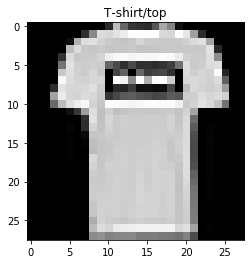

In [8]:
idx = 1

item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
print(item_npimg.shape)
plt.imshow(item_npimg, cmap='gray')
plt.show()

C:\Users\dahlmoon\Anaconda3\envs\pytorch_cpu\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])


C:\Users\dahlmoon\Anaconda3\envs\pytorch_cpu\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000])


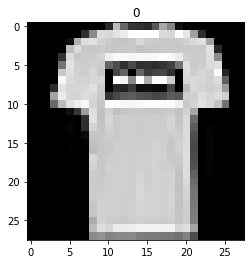

In [9]:
# plot one example
print(trainset.train_data.size())     # (60000, 28, 28)
print(trainset.train_labels.size())   # (60000)
plt.imshow(trainset.train_data[1].numpy(), cmap='gray')
plt.title('%i' % trainset.train_labels[1])
plt.show()

In [10]:
img.max()

tensor(1.)

In [11]:
img.min()

tensor(0.)

In [12]:
img

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

26427392it [01:30, 681243.28it/s]                                                                                      
4423680it [00:24, 1099053.90it/s]                                                                                      

In [59]:
USE_CUDA = torch.cuda.is_available()

In [60]:
USE_CUDA

False

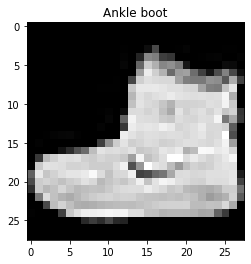

In [61]:
idx = 0
item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
plt.imshow(item_npimg, cmap='gray')
plt.show()

In [63]:
item_npimg.shape

(28, 28)

In [64]:
item_img.shape

torch.Size([1, 28, 28])